In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import scipy.stats as st
from scipy.stats import t as t_student
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from  statsmodels.stats.multicomp import pairwise_tukeyhsd

# DOE 2k 5 Niveles

In [2]:
df=pd.read_excel('DatosExperimento.xlsx')
df

,aq,temperatura,reduccion,paso,iteraciones,objective_base,objective_sa,gap,n,I_o,T_of
0,1,0.27,0.9,0.05,500,0.3,0.00,1.000000,12,0.0,1.291402e-01
1,1,0.03,0.9,0.20,500,0.3,0.30,0.000000,14,0.0,2.430000e-02
2,20,0.27,0.9,0.05,10000,0.3,0.20,0.333333,44,0.0,1.144561e-02
3,1,0.03,0.9,0.05,500,0.3,0.25,0.166667,46,0.0,2.430000e-02
4,1,0.03,0.9,0.20,10000,0.3,0.30,0.000000,84,0.0,5.474401e-04
...,...,...,...,...,...,...,...,...,...,...,...
315,1,0.03,0.1,0.05,10000,0.3,0.30,0.000000,4487,0.0,3.000000e-08
316,1,0.03,0.1,0.20,500,0.3,0.30,0.000000,4492,0.0,3.000000e-07
317,1,0.27,0.9,0.20,10000,0.3,0.30,0.000000,4538,0.0,2.120895e-03
318,1,0.27,0.9,0.05,500,0.3,0.15,0.500000,4544,0.0,1.434891e-01


In [3]:
formula='gap ~ C(aq) + C(temperatura) + C(reduccion) + C(paso) + C(iteraciones) + C(aq):C(temperatura) + C(aq):C(reduccion) + C(aq):C(paso) + C(aq):C(iteraciones) + C(temperatura):C(reduccion) + C(temperatura):C(paso) + C(reduccion):C(paso) + C(temperatura):C(iteraciones) + C(iteraciones):C(reduccion) + C(iteraciones):C(paso) + C(aq):C(temperatura):C(reduccion) + C(aq):C(temperatura):C(paso) + C(aq):C(temperatura):C(iteraciones) + C(aq):C(reduccion):C(paso) + C(aq):C(reduccion):C(iteraciones) + C(aq):C(paso):C(iteraciones) + C(temperatura):C(reduccion):C(paso) + C(temperatura):C(reduccion):C(iteraciones) + C(reduccion):C(paso):C(iteraciones) + C(aq):C(temperatura):C(reduccion):C(paso) + C(aq):C(reduccion):C(paso):C(iteraciones) + C(aq):C(temperatura):C(paso):C(iteraciones) + C(temperatura):C(reduccion):C(paso):C(iteraciones) + C(aq):C(temperatura):C(reduccion):C(paso):C(iteraciones)'
modelo = ols(formula = formula, data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gap   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     15.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           4.72e-45
Time:                        16:00:12   Log-Likelihood:                 120.31
No. Observations:                 320   AIC:                            -176.6
Df Residuals:                     288   BIC:                            -56.03
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                        0.4000      0.055      7.223      0.000       0.291       0.509
C(aq)[T.20]                                                                                     -0.1000      0.078     -1.277      0.203      -0.254       0.054
C(temperatura)[T.0.27]                                                                       -6.523e-16      0.078  -8.33e-15      1.000      -0.154       0.154
C(reduccion)[T.0.9]                                                                          -9.437e-16      0.078   -1.2e-14      1.000      -0.154       0.154
C(paso)[T.0.2]                                                                                  -0.3667      0.078     -4.682      0.000      -0.521      -0.213
C(iteraciones)[T.10000]                                                                         -0.4000      0.078     -5.107      0.000      -0.554      -0.246
C(aq)[T.20]:C(temperatura)[T.0.27]                                                               0.2333      0.111      2.107      0.036       0.015       0.451
C(aq)[T.20]:C(reduccion)[T.0.9]                                                                 -0.0167      0.111     -0.150      0.880      -0.235       0.201
C(aq)[T.20]:C(paso)[T.0.2]                                                                       0.1333      0.111      1.204      0.230      -0.085       0.351
C(aq)[T.20]:C(iteraciones)[T.10000]                                                              0.1000      0.111      0.903      0.367      -0.118       0.318
C(temperatura)[T.0.27]:C(reduccion)[T.0.9]                                                       0.2167      0.111      1.956      0.051      -0.001       0.435
C(temperatura)[T.0.27]:C(paso)[T.0.2]                                                            0.0333      0.111      0.301      0.764      -0.185       0.251
C(reduccion)[T.0.9]:C(paso)[T.0.2]                                                            1.513e-15      0.111   1.37e-14      1.000      -0.218       0.218
C(temperatura)[T.0.27]:C(iteraciones)[T.10000]                                                6.939e-17      0.111   6.26e-16      1.000      -0.218       0.218
C(iteraciones)[T.10000]:C(reduccion)[T.0.9]                                                   4.025e-16      0.111   3.63e-15      1.000      -0.218       0.218
C(iteraciones)[T.10000]:C(paso)[T.0.2]                                                           0.3667      0.111      3.310      0.001       0.149       0.585
C(aq)[T.20]:C(temperatur

In [4]:
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(aq),1.0,0.050000,0.050000,1.630189,2.027054e-01
C(temperatura),1.0,0.903125,0.903125,29.445283,1.221256e-07
C(reduccion),1.0,0.450000,0.450000,14.671698,1.570709e-04
C(paso),1.0,1.800000,1.800000,58.686792,2.831713e-13
C(iteraciones),1.0,7.100347,7.100347,231.498113,8.994299e-39
C(aq):C(temperatura),1.0,0.125347,0.125347,4.086792,4.414423e-02
C(aq):C(reduccion),1.0,0.022222,0.022222,0.724528,3.953697e-01
C(aq):C(paso),1.0,0.088889,0.088889,2.898113,8.976232e-02
C(aq):C(iteraciones),1.0,0.058681,0.058681,1.913208,1.676787e-01
C(temperatura):C(reduccion),1.0,0.425347,0.425347,13.867925,2.359111e-04


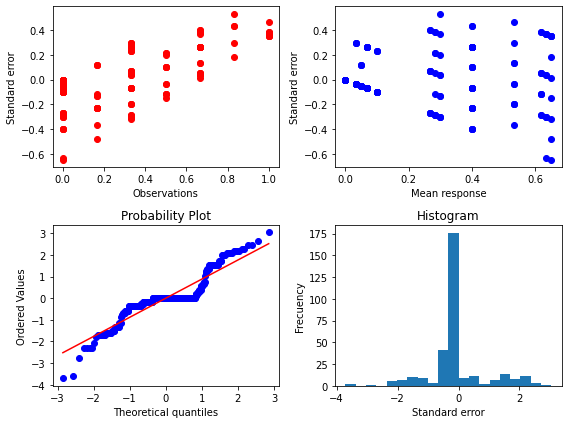

In [5]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df['gap'], modelo.resid, color='red')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(modelo.fittedvalues, modelo.resid, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(modelo.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(modelo.resid_pearson,bins=int(1+3.32*m.log(len(modelo.resid_pearson))))
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplots aq')

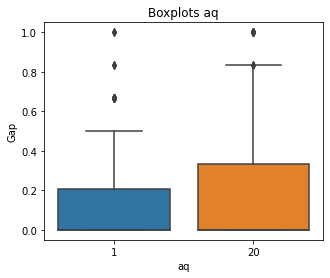

In [6]:
plt.figure(figsize=(5,4))
sns.boxplot(df['aq'],df['gap'])
plt.ylabel("Gap")
plt.xlabel("aq")
plt.title("Boxplots aq")

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplots Temperaturas')

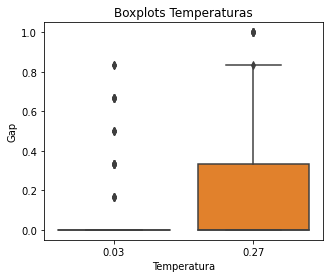

In [7]:
plt.figure(figsize=(5,4))
sns.boxplot(df['temperatura'],df['gap'])
plt.ylabel("Gap")
plt.xlabel("Temperatura")
plt.title("Boxplots Temperaturas")

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplots Reducciones')

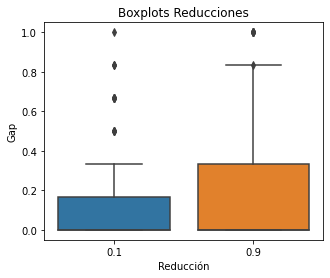

In [8]:
plt.figure(figsize=(5,4))
sns.boxplot(df['reduccion'],df['gap'])
plt.ylabel("Gap")
plt.xlabel("Reducción")
plt.title("Boxplots Reducciones")

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplots Temperaturas')

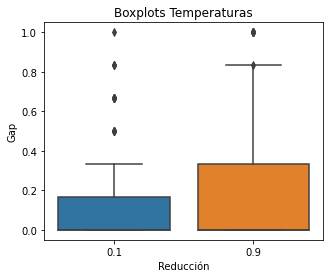

In [9]:
plt.figure(figsize=(5,4))
sns.boxplot(df['reduccion'],df['gap'])
plt.ylabel("Gap")
plt.xlabel("Reducción")
plt.title("Boxplots Temperaturas")

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplots Pasos')

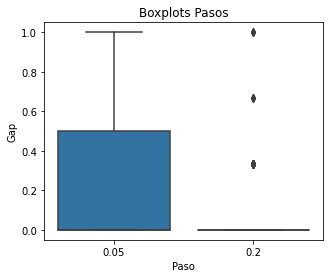

In [10]:
plt.figure(figsize=(5,4))
sns.boxplot(df['paso'],df['gap'])
plt.ylabel("Gap")
plt.xlabel("Paso")
plt.title("Boxplots Pasos")

C:\Users\Roberto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplots Iteraciones')

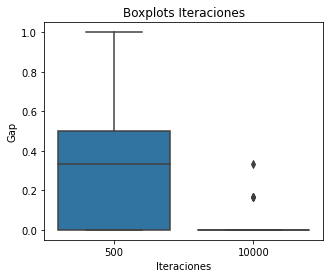

In [11]:
plt.figure(figsize=(5,4))
sns.boxplot(df['iteraciones'],df['gap'])
plt.ylabel("Gap")
plt.xlabel("Iteraciones")
plt.title("Boxplots Iteraciones")

# DOE 2k 4 Niveles

In [21]:
df2=pd.read_excel('DatosExperimento2.xlsx')
df2

,temperatura,reduccion,paso,iteraciones,objective_base,objective_sa,gap,n,I_o,T_of
0,0.09,0.1,0.05,500,0.9,0.605,0.327778,13,0,9.000000e-07
1,0.81,0.1,0.05,10000,0.9,0.705,0.216667,18,0,8.100000e-06
2,0.81,0.1,0.05,500,0.9,0.635,0.294444,20,0,8.100000e-03
3,0.09,0.9,0.25,500,0.9,0.500,0.444444,22,0,7.290000e-02
4,0.09,0.1,0.25,500,0.9,0.675,0.250000,23,0,9.000000e-03
...,...,...,...,...,...,...,...,...,...,...
155,0.09,0.9,0.05,500,0.9,0.430,0.522222,1339,0,4.782969e-02
156,0.09,0.1,0.25,10000,0.9,0.870,0.033333,1341,0,9.000000e-04
157,0.81,0.9,0.05,10000,0.9,0.690,0.233333,1376,0,2.027556e-02
158,0.81,0.9,0.25,10000,0.9,0.775,0.138889,1401,0,5.814974e-02


In [22]:
formula='gap ~ C(temperatura) + C(reduccion) + C(paso) + C(iteraciones) + C(temperatura):C(reduccion) + C(temperatura):C(paso) + C(reduccion):C(paso) + C(temperatura):C(iteraciones) + C(iteraciones):C(reduccion) + C(iteraciones):C(paso) + C(temperatura):C(reduccion):C(paso) + C(temperatura):C(reduccion):C(iteraciones) + C(reduccion):C(paso):C(iteraciones) + C(temperatura):C(reduccion):C(paso):C(iteraciones)'
modelo2 = ols(formula = formula, data=df2).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gap   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     16.83
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.05e-24
Time:                        17:44:46   Log-Likelihood:                 131.57
No. Observations:                 160   AIC:                            -231.1
Df Residuals:                     144   BIC:                            -181.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                            0.4256      0.035     12.007      0.000       0.356       0.496
C(temperatura)[T.0.81]                                                              -0.0267      0.050     -0.532      0.596      -0.126       0.072
C(reduccion)[T.0.9]                                                                 -0.0378      0.050     -0.754      0.452      -0.137       0.061
C(paso)[T.0.25]                                                                     -0.1783      0.050     -3.558      0.001      -0.277      -0.079
C(iteraciones)[T.10000]                                                             -0.2389      0.050     -4.766      0.000      -0.338      -0.140
C(temperatura)[T.0.81]:C(reduccion)[T.0.9]                                           0.1117      0.071      1.575      0.117      -0.028       0.252
C(temperatura)[T.0.81]:C(paso)[T.0.25]                                               0.1139      0.071      1.607      0.110      -0.026       0.254
C(reduccion)[T.0.9]:C(paso)[T.0.25]                                                  0.0739      0.071      1.042      0.299      -0.066       0.214
C(temperatura)[T.0.81]:C(iteraciones)[T.10000]                                       0.0039      0.071      0.055      0.956      -0.136       0.144
C(iteraciones)[T.10000]:C(reduccion)[T.0.9]                                          0.0633      0.071      0.894      0.373      -0.077       0.203
C(iteraciones)[T.10000]:C(paso)[T.0.25]                                              0.0322      0.071      0.455      0.650      -0.108       0.172
C(temperatura)[T.0.81]:C(reduccion)[T.0.9]:C(paso)[T.0.25]                          -0.0178      0.100     -0.177      0.859      -0.216       0.180
C(temperatura)[T.0.81]:C(reduccion)[T.0.9]:C(iteraciones)[T.10000]                  -0.1133      0.100     -1.131      0.260      -0.311       0.085
C(reduccion)[T.0.9]:C(paso)[T.0.25]:C(iteraciones)[T.10000]                         -0.0228      0.100     -0.227      0.821      -0.221       0.175
C(temperatura)[T.0.81]:C(reduccion)[0.1]:C(paso)[T.0.25]:C(iteraciones)[T.10000]    -0.0906      0.100     -0.903      0.368      -0.289       0.108
C(temperatura)[T.0.81]:C(reduccion)[0.9]:C(paso)[T.0.25]:C(iteraciones)[T.10000]    -0.0794      0.100     -0.793      0.429      -0.278       0.119
==============================================================================
Omnibus:                        3.301   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.818
Skew:          

In [23]:
anova = anova_lm(modelo2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(temperatura),1.0,0.046316,0.046316,3.687379,5.680258e-02
C(reduccion),1.0,0.098340,0.098340,7.829284,5.844770e-03
C(paso),1.0,0.397781,0.397781,31.669011,9.235604e-08
C(iteraciones),1.0,2.390123,2.390123,190.287803,4.050959e-28
C(temperatura):C(reduccion),1.0,0.023901,0.023901,1.902878,1.698950e-01
C(temperatura):C(paso),1.0,0.039063,0.039063,3.109930,7.993720e-02
C(reduccion):C(paso),1.0,0.031797,0.031797,2.531499,1.137871e-01
C(temperatura):C(iteraciones),1.0,0.090779,0.090779,7.227263,8.027166e-03
C(iteraciones):C(reduccion),1.0,0.000038,0.000038,0.003010,9.563225e-01
C(iteraciones):C(paso),1.0,0.004694,0.004694,0.373745,5.419341e-01


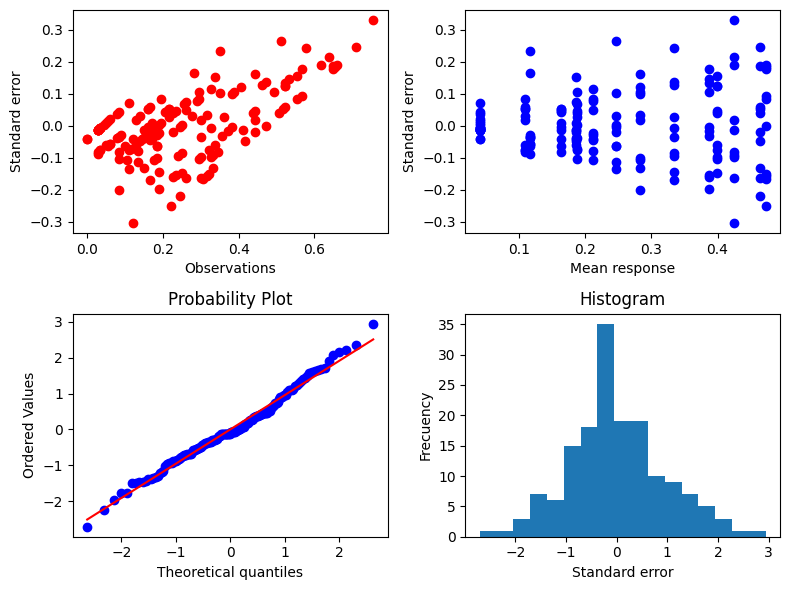

In [24]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df2['gap'], modelo2.resid, color='red')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(modelo2.fittedvalues, modelo2.resid, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(modelo2.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(modelo2.resid_pearson,bins=int(1+3.32*m.log(len(modelo2.resid_pearson))))
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

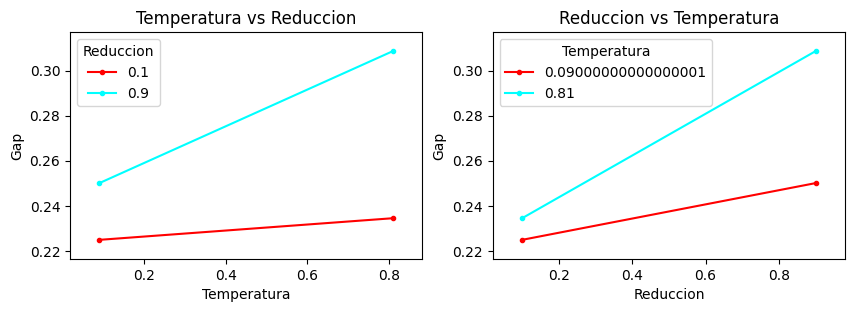

In [25]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df2['temperatura'], df2['reduccion'], df2['gap'],ax=ax[0],legendtitle="Reduccion");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Temperatura")
ax[0].set_title("Temperatura vs Reduccion")

interaction_plot(df2['reduccion'], df2['temperatura'], df2['gap'],ax=ax[1],legendtitle="Temperatura");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Reduccion")
ax[1].set_title("Reduccion vs Temperatura")

plt.show()

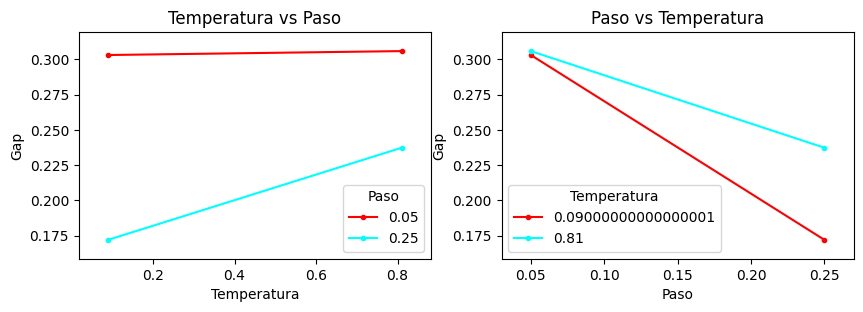

In [26]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df2['temperatura'], df2['paso'], df2['gap'],ax=ax[0],legendtitle="Paso");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Temperatura")
ax[0].set_title("Temperatura vs Paso")

interaction_plot(df2['paso'], df2['temperatura'], df2['gap'],ax=ax[1],legendtitle="Temperatura");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Paso")
ax[1].set_title("Paso vs Temperatura")

plt.show()

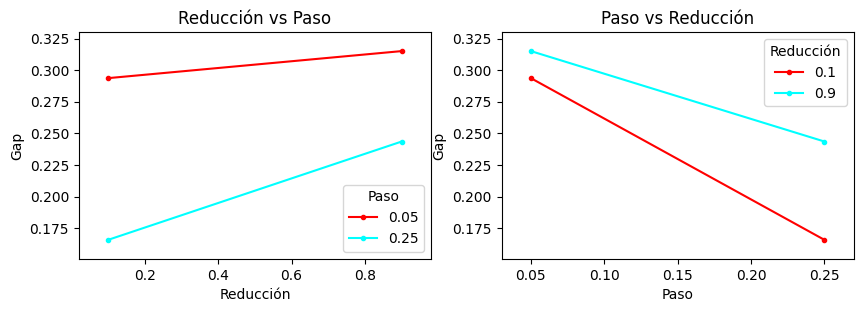

In [27]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df2['reduccion'], df2['paso'], df2['gap'],ax=ax[0],legendtitle="Paso");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Reducción")
ax[0].set_title("Reducción vs Paso")

interaction_plot(df2['paso'], df2['reduccion'], df2['gap'],ax=ax[1],legendtitle="Reducción");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Paso")
ax[1].set_title("Paso vs Reducción")

plt.show()

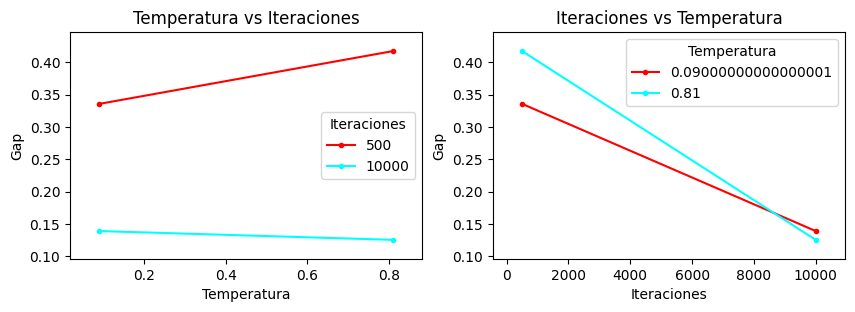

In [28]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df2['temperatura'], df2['iteraciones'], df2['gap'],ax=ax[0],legendtitle="Iteraciones");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Temperatura")
ax[0].set_title("Temperatura vs Iteraciones")

interaction_plot(df2['iteraciones'], df2['temperatura'], df2['gap'],ax=ax[1],legendtitle="Temperatura");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Iteraciones")
ax[1].set_title("Iteraciones vs Temperatura")

plt.show()

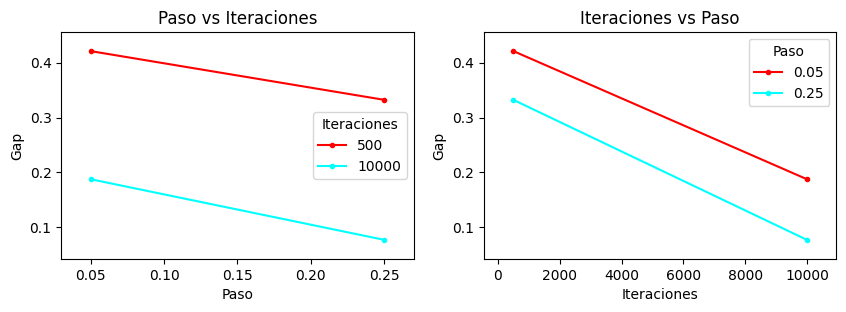

In [29]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df2['paso'], df2['iteraciones'], df2['gap'],ax=ax[0],legendtitle="Iteraciones");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Paso")
ax[0].set_title("Paso vs Iteraciones")

interaction_plot(df2['iteraciones'], df2['paso'], df2['gap'],ax=ax[1],legendtitle="Paso");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Iteraciones")
ax[1].set_title("Iteraciones vs Paso")

plt.show()

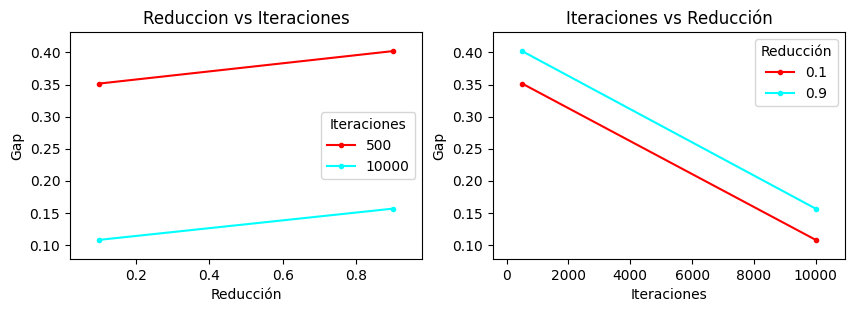

In [30]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df2['reduccion'], df2['iteraciones'], df2['gap'],ax=ax[0],legendtitle="Iteraciones");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Reducción")
ax[0].set_title("Reduccion vs Iteraciones")

interaction_plot(df2['iteraciones'], df2['reduccion'], df2['gap'],ax=ax[1],legendtitle="Reducción");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Iteraciones")
ax[1].set_title("Iteraciones vs Reducción")

plt.show()

In [31]:
comp = pairwise_tukeyhsd(df2['gap'], df2['temperatura'])
comp.summary()
#comp.plot_simultaneous(figsize=(8,5))
#plt.title('Comparison IC gaps')
#plt.ylabel('Temperatura')
#plt.xlabel('IC 95% gap')
#plt.tight_layout()

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


group1,group2,meandiff,p-adj,lower,upper,reject
0.09000000000000001,0.81,0.034,0.2251,-0.0212,0.0892,False


Text(0.5, 1.0, 'Boxplots Temperatura')

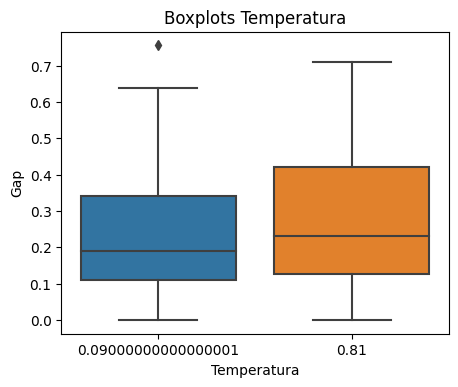

In [13]:
plt.figure(figsize=(5,4))
sns.boxplot(df2['temperatura'],df2['gap'])
plt.ylabel("Gap")
plt.xlabel("Temperatura")
plt.title("Boxplots Temperatura")

In [14]:
comp = pairwise_tukeyhsd(df2['gap'], df2['reduccion'])
comp.summary()
#comp.plot_simultaneous(figsize=(8,5))
#plt.title('Comparison IC gaps')
#plt.ylabel('Temperatura')
#plt.xlabel('IC 95% gap')
#plt.tight_layout()

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


group1,group2,meandiff,p-adj,lower,upper,reject
0.1,0.9,0.0496,0.0763,-0.0053,0.1045,False


Text(0.5, 1.0, 'Boxplots Reducciones')

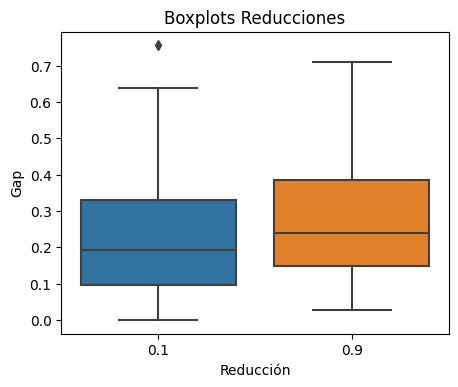

In [15]:
plt.figure(figsize=(5,4))
sns.boxplot(df2['reduccion'],df2['gap'])
plt.ylabel("Gap")
plt.xlabel("Reducción")
plt.title("Boxplots Reducciones")

In [16]:
comp = pairwise_tukeyhsd(df2['gap'], df2['paso'])
comp.summary()
#comp.plot_simultaneous(figsize=(8,5))
#plt.title('Comparison IC gaps')
#plt.ylabel('Temperatura')
#plt.xlabel('IC 95% gap')
#plt.tight_layout()

TypeError: zip argument #4 must support iteration

Text(0.5, 1.0, 'Boxplots Pasos')

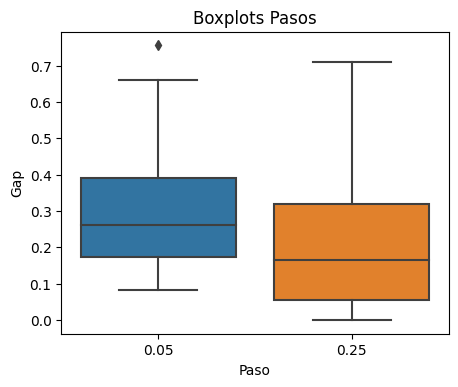

In [17]:
plt.figure(figsize=(5,4))
sns.boxplot(df2['paso'],df2['gap'])
plt.ylabel("Gap")
plt.xlabel("Paso")
plt.title("Boxplots Pasos")

In [18]:
comp = pairwise_tukeyhsd(df2['gap'], df2['iteraciones'])
comp.summary()
#comp.plot_simultaneous(figsize=(8,5))
#plt.title('Comparison IC gaps')
#plt.ylabel('Temperatura')
#plt.xlabel('IC 95% gap')
#plt.tight_layout()

TypeError: zip argument #4 must support iteration

Text(0.5, 1.0, 'Boxplots Iteraciones')

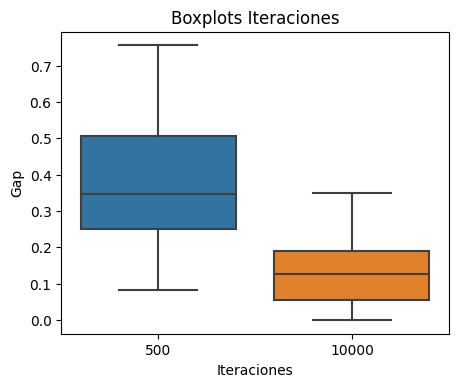

In [19]:
plt.figure(figsize=(5,4))
sns.boxplot(df2['iteraciones'],df2['gap'])
plt.ylabel("Gap")
plt.xlabel("Iteraciones")
plt.title("Boxplots Iteraciones")

# DOE 2k 4 Niveles

In [32]:
df22=pd.read_excel('DatosExperimento22.xlsx')
df22

,reduccion,paso,iteraciones,objective_base,objective_sa,gap,n,I_o,T_of
0,0.1,0.25,10000,0.9,0.870,0.033333,11798,0.0,0.000068
1,0.1,0.05,500,0.9,0.695,0.227778,11800,0.0,0.006750
2,0.9,0.05,500,0.9,0.570,0.366667,11800,0.0,0.675000
3,0.9,0.05,500,0.9,0.575,0.361111,11802,0.0,0.546750
4,0.9,0.25,500,0.9,0.355,0.605556,11807,0.0,0.398581
...,...,...,...,...,...,...,...,...,...
75,0.9,0.25,500,0.9,0.500,0.444444,12616,0.0,0.492075
76,0.9,0.25,500,0.9,0.710,0.211111,12621,0.0,0.398581
77,0.9,0.25,500,0.9,0.380,0.577778,12624,0.0,0.492075
78,0.1,0.05,500,0.9,0.620,0.311111,12627,0.0,0.000675


In [33]:
formula='gap ~ C(reduccion) + C(paso) + C(iteraciones) + C(reduccion):C(paso) + C(reduccion):C(iteraciones) + C(iteraciones):C(paso) + C(reduccion):C(paso):C(iteraciones)'
modelo22 = ols(formula = formula, data=df22).fit()
modelo22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gap   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     17.98
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.38e-13
Time:                        17:45:21   Log-Likelihood:                 61.809
No. Observations:                  80   AIC:                            -107.6
Df Residuals:                      72   BIC:                            -88.56
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       0.3500      0.037      9.396      0.000       0.276       0.424
C(reduccion)[T.0.9]                                             0.1689      0.053      3.206      0.002       0.064       0.274
C(paso)[T.0.25]                                                -0.0794      0.053     -1.508      0.136      -0.184       0.026
C(iteraciones)[T.10000]                                        -0.1822      0.053     -3.459      0.001      -0.287      -0.077
C(reduccion)[T.0.9]:C(paso)[T.0.25]                            -0.0672      0.074     -0.902      0.370      -0.216       0.081
C(reduccion)[T.0.9]:C(iteraciones)[T.10000]                    -0.0994      0.074     -1.335      0.186      -0.248       0.049
C(iteraciones)[T.10000]:C(paso)[T.0.25]                        -0.0556      0.074     -0.746      0.458      -0.204       0.093
C(reduccion)[T.0.9]:C(paso)[T.0.25]:C(iteraciones)[T.10000]     0.0628      0.105      0.596      0.553      -0.147       0.273
==============================================================================
Omnibus:                       24.266   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.342
Skew:                           1.089   Prob(JB):                     5.25e-11
Kurtosis:                       6.075   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
anova = anova_lm(modelo22)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(reduccion),1.0,0.205031,0.205031,14.777986,2.584381e-04
C(paso),1.0,0.313195,0.313195,22.574065,1.004497e-05
C(iteraciones),1.0,1.190991,1.190991,85.842768,6.716043e-14
C(reduccion):C(paso),1.0,0.006420,0.006420,0.462743,4.985265e-01
C(reduccion):C(iteraciones),1.0,0.023158,0.023158,1.669138,2.005056e-01
C(iteraciones):C(paso),1.0,0.002920,0.002920,0.210474,6.477780e-01
C(reduccion):C(paso):C(iteraciones),1.0,0.004926,0.004926,0.355073,5.531243e-01
Residual,72.0,0.998935,0.013874,NaN,NaN


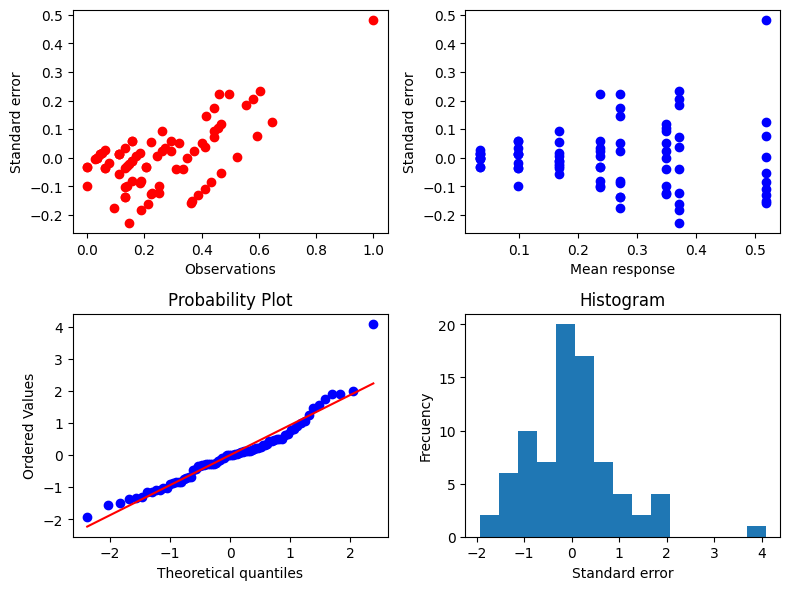

In [35]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df22['gap'], modelo22.resid, color='red')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(modelo22.fittedvalues, modelo22.resid, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(modelo22.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(modelo22.resid_pearson,bins=int(1+3.32*m.log(len(modelo22.resid_pearson))))
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

# DOE 3 Niveles Fijos

In [40]:
df3=pd.read_excel('DatosExperimento3.xlsx')
df3

,reduccion,paso,iteraciones,objective_base,objective_sa,gap,n,I_o,T_of
0,0.5,0.25,10000,0.9,0.875,0.027778,1412,0.00,0.005273
1,0.3,0.15,5000,0.9,-99999.000,1.000000,1412,0.05,0.675000
2,0.5,0.05,7000,0.9,0.725,0.194444,1423,0.00,0.000330
3,0.9,0.15,500,0.9,-99999.000,1.000000,1423,0.05,0.675000
4,0.1,0.05,5000,0.9,0.660,0.266667,1426,0.00,0.000675
...,...,...,...,...,...,...,...,...,...
1245,0.9,0.20,2500,0.9,0.460,0.488889,11002,0.00,0.066472
1246,0.7,0.10,2500,0.9,0.630,0.300000,11013,0.00,0.013347
1247,0.5,0.10,500,0.9,0.410,0.544444,11016,0.00,0.084375
1248,0.7,0.15,7000,0.9,-99999.000,1.000000,11016,0.05,0.675000


In [41]:
formula='gap ~ C(reduccion) + C(paso) + C(iteraciones) + C(reduccion):C(paso) + C(reduccion):C(iteraciones) + C(paso):C(iteraciones) + C(reduccion):C(paso):C(iteraciones)'
modelo3 = ols(formula = formula, data=df3).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gap   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:46:32   Log-Likelihood:                 1543.9
No. Observations:                1250   AIC:                            -2838.
Df Residuals:                    1125   BIC:                            -2196.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       0.3672      0.023     15.656      0.000       0.321       0.413
C(reduccion)[T.0.3]                                         -2.097e-15      0.033  -6.32e-14      1.000      -0.065       0.065
C(reduccion)[T.0.5]                                             0.0017      0.033      0.050      0.960      -0.063       0.067
C(reduccion)[T.0.7]                                             0.1444      0.033      4.354      0.000       0.079       0.210
C(reduccion)[T.0.9]                                             0.1367      0.033      4.120      0.000       0.072       0.202
C(paso)[T.0.1]                                                 -0.1306      0.033     -3.936      0.000      -0.196      -0.065
C(paso)[T.0.15]                                                 0.6328      0.033     19.076      0.000       0.568       0.698
C(paso)[T.0.2]                                                 -0.1661      0.033     -5.008      0.000      -0.231      -0.101
C(paso)[T.0.25]                                                -0.1350      0.033     -4.070      0.000      -0.200      -0.070
C(iteraciones)[T.2500]                                         -0.1083      0.033     -3.266      0.001      -0.173      -0.043
C(iteraciones)[T.5000]                                         -0.1267      0.033     -3.819      0.000      -0.192      -0.062
C(iteraciones)[T.7000]                                         -0.1889      0.033     -5.694      0.000      -0.254      -0.124
C(iteraciones)[T.10000]                                        -0.2006      0.033     -6.046      0.000      -0.266      -0.135
C(reduccion)[T.0.3]:C(paso)[T.0.1]                              0.1100      0.047      2.345      0.019       0.018       0.202
C(reduccion)[T.0.5]:C(paso)[T.0.1]                              0.1328      0.047      2.830      0.005       0.041       0.225
C(reduccion)[T.0.7]:C(paso)[T.0.1]                              0.0267      0.047      0.568      0.570      -0.065       0.119
C(reduccion)[T.0.9]:C(paso)[T.0.1]                              0.1122      0.047      2.392      0.017       0.020       0.204
C(reduccion)[T.0.3]:C(paso)[T.0.15]                          3.213e-15      0.047   6.85e-14      1.000      -0.092       0.092
C(reduccion)[T.0.5]:C(paso)[T.0.15]                            -0.0017      0.047     -0.036      0.972      -0.094       0.090
C(reduccion)[T.0.7]:C(paso)[T.0.15]                            -0.1444      0.047     -3.079      0.002      -0.236      -0.052
C(reduccion)[T.0.9]:C(paso)[T.0.15]                            -0.1367      0.047     -2.913      0.004      -0.229      -0.045
C(reduccion

In [42]:
anova = anova_lm(modelo3)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(reduccion),4.0,1.335695,0.333924,60.694192,1.855128e-46
C(paso),4.0,134.151495,33.537874,6095.864372,0.000000e+00
C(iteraciones),4.0,6.119577,1.529894,278.074518,3.175407e-166
C(reduccion):C(paso),16.0,0.405907,0.025369,4.611114,4.624666e-09
C(reduccion):C(iteraciones),16.0,0.612264,0.038266,6.955341,1.835377e-15
C(paso):C(iteraciones),16.0,1.618970,0.101186,18.391564,1.109759e-46
C(reduccion):C(paso):C(iteraciones),64.0,0.669464,0.010460,1.901284,3.925432e-05
Residual,1125.0,6.189460,0.005502,NaN,NaN


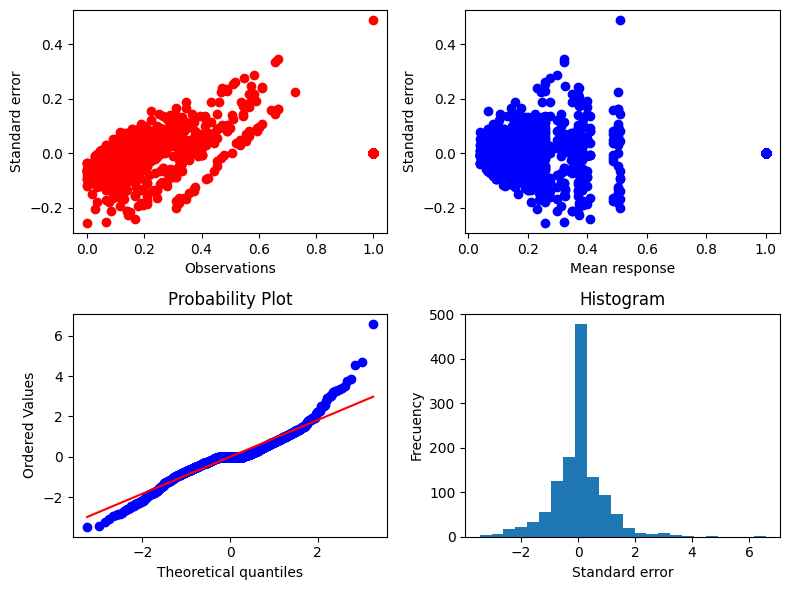

In [43]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df3['gap'], modelo3.resid, color='red')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(modelo3.fittedvalues, modelo3.resid, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(modelo3.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(modelo3.resid_pearson,bins=int(1+3.32*m.log(len(modelo3.resid_pearson))))
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

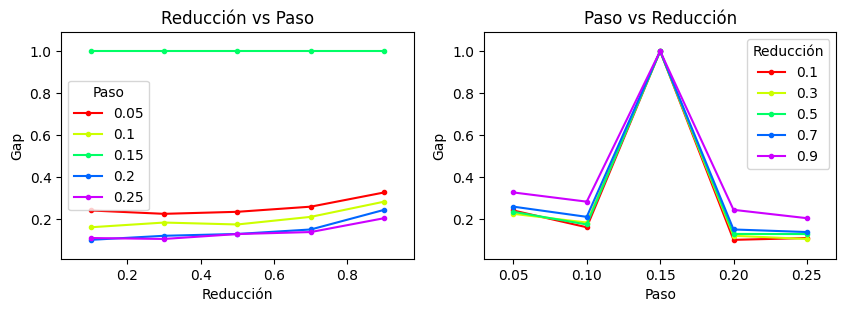

In [34]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df3['reduccion'], df3['paso'], df3['gap'],ax=ax[0],legendtitle="Paso");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Reducción")
ax[0].set_title("Reducción vs Paso")

interaction_plot(df3['paso'], df3['reduccion'], df3['gap'],ax=ax[1],legendtitle="Reducción");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Paso")
ax[1].set_title("Paso vs Reducción")

plt.show()

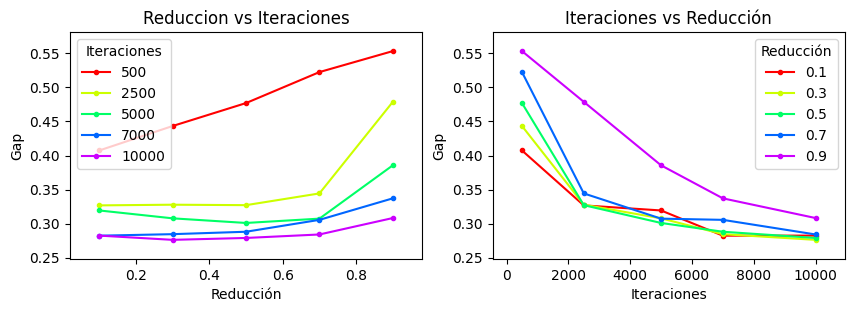

In [35]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df3['reduccion'], df3['iteraciones'], df3['gap'],ax=ax[0],legendtitle="Iteraciones");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Reducción")
ax[0].set_title("Reduccion vs Iteraciones")

interaction_plot(df3['iteraciones'], df3['reduccion'], df3['gap'],ax=ax[1],legendtitle="Reducción");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Iteraciones")
ax[1].set_title("Iteraciones vs Reducción")

plt.show()

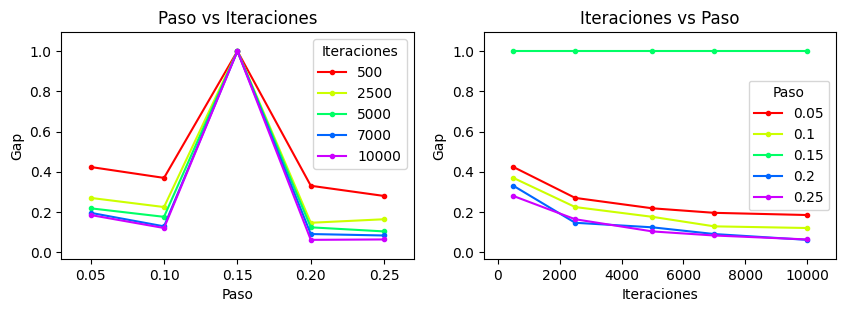

In [36]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})

fig,ax=plt.subplots(1,2)
interaction_plot(df3['paso'], df3['iteraciones'], df3['gap'],ax=ax[0],legendtitle="Iteraciones");
ax[0].set_ylabel("Gap")
ax[0].set_xlabel("Paso")
ax[0].set_title("Paso vs Iteraciones")

interaction_plot(df3['iteraciones'], df3['paso'], df3['gap'],ax=ax[1],legendtitle="Paso");
ax[1].set_ylabel("Gap")
ax[1].set_xlabel("Iteraciones")
ax[1].set_title("Iteraciones vs Paso")

plt.show()

In [37]:
comp = pairwise_tukeyhsd(df3['gap'], df3['reduccion'])
comp.summary()
#comp.plot_simultaneous(figsize=(8,5))
#plt.title('Comparison IC gaps')
#plt.ylabel('Temperatura')
#plt.xlabel('IC 95% gap')
#plt.tight_layout()

group1,group2,meandiff,p-adj,lower,upper,reject
0.1,0.3,0.0043,0.9,-0.0805,0.089,False
0.1,0.5,0.0108,0.9,-0.074,0.0955,False
0.1,0.7,0.0291,0.8731,-0.0557,0.1138,False
0.1,0.9,0.0889,0.0344,0.0041,0.1736,True
0.3,0.5,0.0065,0.9,-0.0782,0.0913,False
0.3,0.7,0.0248,0.9,-0.0599,0.1096,False
0.3,0.9,0.0846,0.0505,-0.0001,0.1694,False
0.5,0.7,0.0183,0.9,-0.0664,0.1031,False
0.5,0.9,0.0781,0.0875,-0.0066,0.1629,False
0.7,0.9,0.0598,0.3032,-0.0249,0.1445,False


Text(0.5, 1.0, 'Boxplots Reducciones')

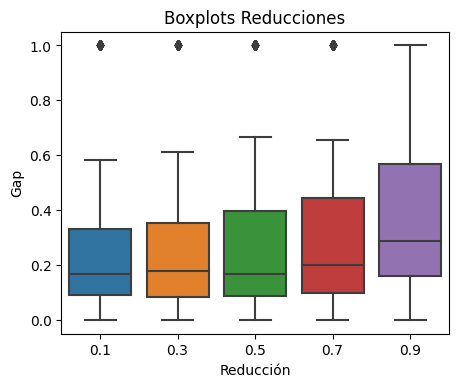

In [38]:
plt.figure(figsize=(5,4))
sns.boxplot(df3['reduccion'],df3['gap'])
plt.ylabel("Gap")
plt.xlabel("Reducción")
plt.title("Boxplots Reducciones")

In [39]:
comp = pairwise_tukeyhsd(df3['gap'], df3['paso'])
comp.summary()
#comp.plot_simultaneous(figsize=(8,5))
#plt.title('Comparison IC gaps')
#plt.ylabel('Temperatura')
#plt.xlabel('IC 95% gap')
#plt.tight_layout()

group1,group2,meandiff,p-adj,lower,upper,reject
0.05,0.1,-0.0548,0.001,-0.0833,-0.0262,True
0.05,0.15,0.7414,0.001,0.7129,0.7699,True
0.05,0.2,-0.1081,0.001,-0.1366,-0.0796,True
0.05,0.25,-0.1198,0.001,-0.1484,-0.0913,True
0.1,0.15,0.7961,0.001,0.7676,0.8246,True
0.1,0.2,-0.0533,0.001,-0.0818,-0.0248,True
0.1,0.25,-0.0651,0.001,-0.0936,-0.0366,True
0.15,0.2,-0.8495,0.001,-0.878,-0.821,True
0.15,0.25,-0.8612,0.001,-0.8897,-0.8327,True
0.2,0.25,-0.0118,0.7661,-0.0403,0.0168,False


Text(0.5, 1.0, 'Boxplots Pasos')

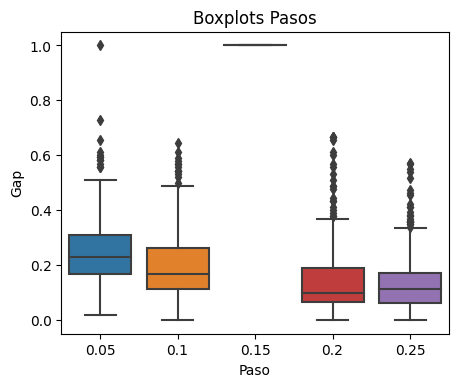

In [40]:
plt.figure(figsize=(5,4))
sns.boxplot(df3['paso'],df3['gap'])
plt.ylabel("Gap")
plt.xlabel("Paso")
plt.title("Boxplots Pasos")

In [41]:
comp = pairwise_tukeyhsd(df3['gap'],df3['iteraciones'])
comp.summary()
#comp.plot_simultaneous(figsize=(8,5))
#plt.title('Comparison IC gaps')
#plt.ylabel('Temperatura')
#plt.xlabel('IC 95% gap')
#plt.tight_layout()

group1,group2,meandiff,p-adj,lower,upper,reject
500,2500,-0.1196,0.001,-0.203,-0.0363,True
500,5000,-0.1564,0.001,-0.2398,-0.073,True
500,7000,-0.181,0.001,-0.2644,-0.0977,True
500,10000,-0.1946,0.001,-0.278,-0.1112,True
2500,5000,-0.0367,0.7224,-0.1201,0.0466,False
2500,7000,-0.0614,0.2609,-0.1448,0.022,False
2500,10000,-0.0749,0.1018,-0.1583,0.0084,False
5000,7000,-0.0247,0.9,-0.108,0.0587,False
5000,10000,-0.0382,0.6951,-0.1216,0.0452,False
7000,10000,-0.0135,0.9,-0.0969,0.0698,False


Text(0.5, 1.0, 'Boxplots Iteraciones')

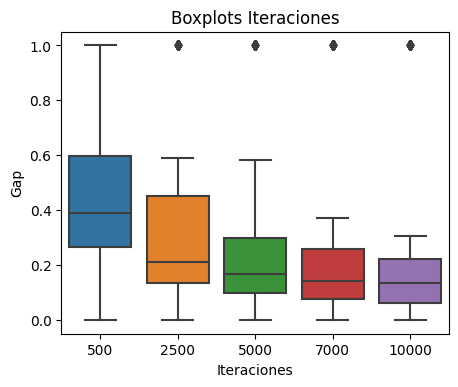

In [42]:
plt.figure(figsize=(5,4))
sns.boxplot(df3['iteraciones'],df3['gap'])
plt.ylabel("Gap")
plt.xlabel("Iteraciones")
plt.title("Boxplots Iteraciones")